<a href="https://colab.research.google.com/github/preetamjumech/House-Sales-in-King-County/blob/main/House_Sales_in_King_County_Preetam_Saha_01_06_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_csv("kc_house_data.csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [5]:
X = df.iloc[:,3:]
y=df.iloc[:,3]

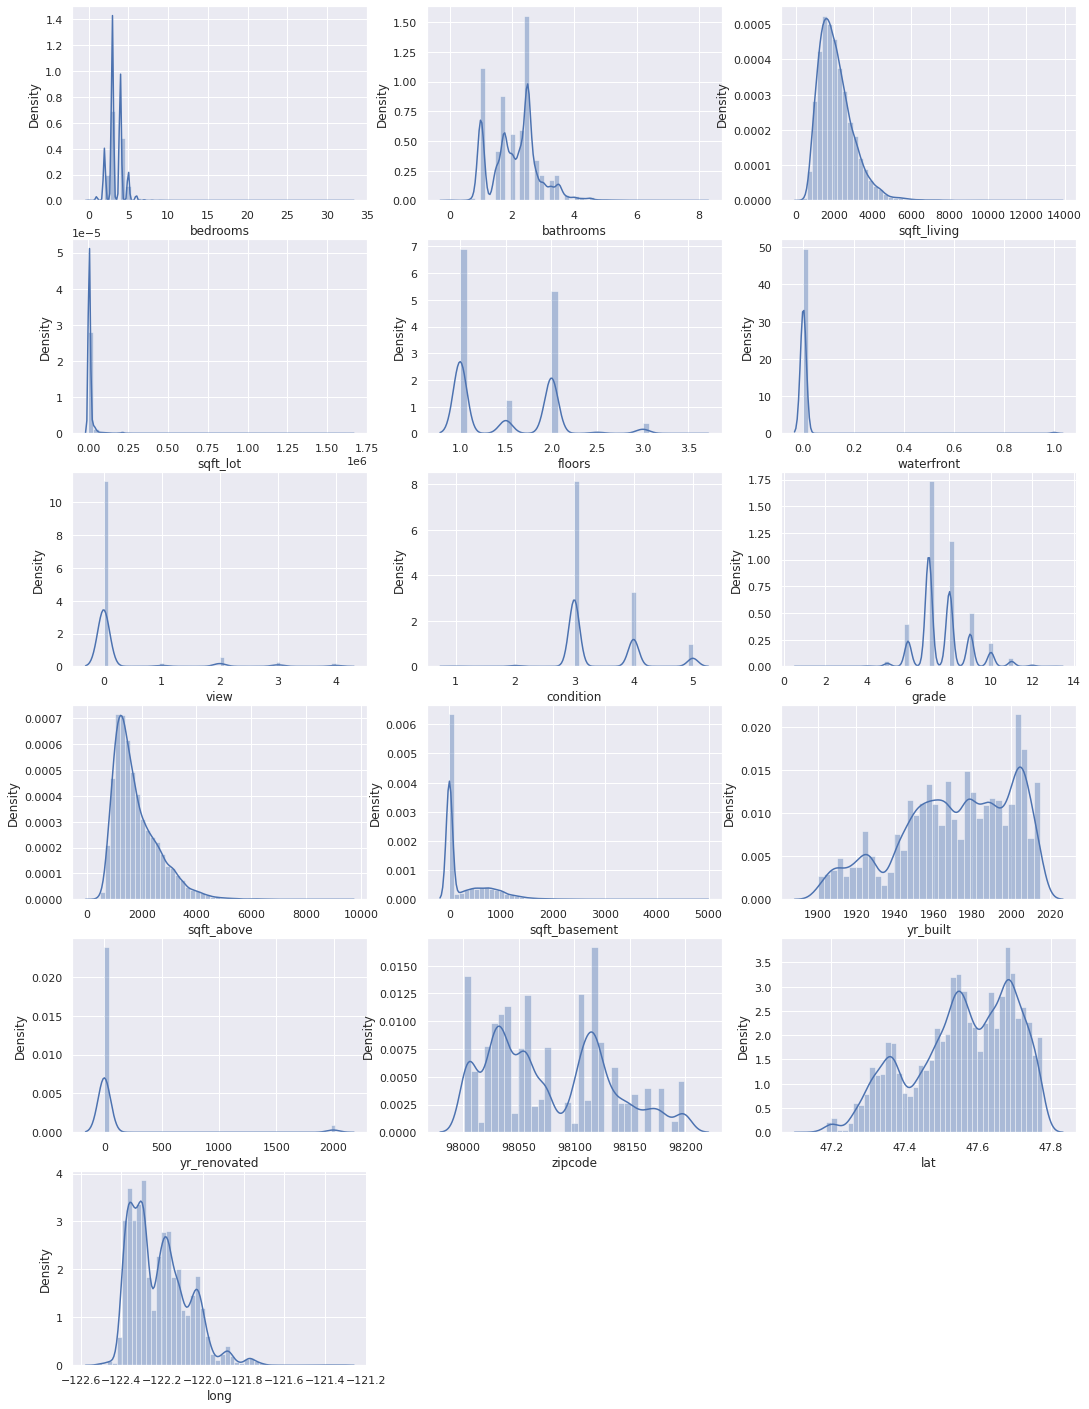

In [6]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(18,25))
for i in range(3,19):
  plt.subplot(6,3,i-2)
  sns.distplot(df.iloc[:,i])

In [7]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import mean_squared_error

In [8]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor(max_depth=10,random_state=48)

In [11]:
X.shape

(21613, 18)

In [12]:
y.shape

(21613,)

In [14]:
from itertools import combinations
for i , j in combinations(range(18),2):
  # print(i,j)
  cv_score=cross_val_score(dt,X=np.array(X.iloc[:,i]).reshape(-1,1),y=X.iloc[:,j],scoring="neg_root_mean_squared_error",cv=5).mean()
  print(f"{i},{j} has cv_score {np.round(cv_score)}")

0,1 has cv_score -1.0
0,2 has cv_score -735.0
0,3 has cv_score -41200.0
0,4 has cv_score -1.0
0,5 has cv_score -0.0
0,6 has cv_score -1.0
0,7 has cv_score -1.0
0,8 has cv_score -1.0
0,9 has cv_score -715.0
0,10 has cv_score -420.0
0,11 has cv_score -29.0
0,12 has cv_score -401.0
0,13 has cv_score -52.0
0,14 has cv_score -0.0
0,15 has cv_score -0.0
0,16 has cv_score -618.0
0,17 has cv_score -27242.0
1,2 has cv_score -594.0
1,3 has cv_score -41146.0
1,4 has cv_score -0.0
1,5 has cv_score -0.0
1,6 has cv_score -1.0
1,7 has cv_score -1.0
1,8 has cv_score -1.0
1,9 has cv_score -590.0
1,10 has cv_score -414.0
1,11 has cv_score -24.0
1,12 has cv_score -401.0
1,13 has cv_score -52.0
1,14 has cv_score -0.0
1,15 has cv_score -0.0
1,16 has cv_score -559.0
1,17 has cv_score -27305.0
2,3 has cv_score -42243.0
2,4 has cv_score -1.0
2,5 has cv_score -0.0
2,6 has cv_score -1.0
2,7 has cv_score -1.0
2,8 has cv_score -1.0
2,9 has cv_score -406.0
2,10 has cv_score -406.0
2,11 has cv_score -28.0
2,12 has 

In [15]:
from hyperopt import fmin,hp,STATUS_OK,tpe,Trials
from hyperopt.pyll.base import scope
import hyperopt

In [31]:
hyperparameters={
    "n_neighbors":scope.int(hp.quniform("n_neighbors",2,12,1)),
    "weights":hp.choice("weights",["uniform","distance"]),
     #"weights":hp.choice("weights",[0,1]),
    #"algorithm":hp.choice(list(['auto', 'ball_tree', 'kd_tree', 'brute']))
    "leaf_size":scope.int(hp.quniform("leaf_size",30,45,1))
}

In [32]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=123)

In [33]:
def hp_obj_func_knn(params):
  knn=KNeighborsRegressor(**params)
  out=cross_val_score(knn,X_train,y_train,cv=5,scoring="neg_root_mean_squared_error").mean()
  return out

In [34]:
def sur_fun_dt(params):
  perf=hp_obj_func_knn(params)
  return {"loss":-perf,"status":STATUS_OK}

In [35]:
trials=Trials()
best_knn = fmin(sur_fun_dt,space=hyperparameters,algo=tpe.suggest,max_evals=10,trials=trials)
print("best_knn:")
print(best_knn)


100%|██████████| 10/10 [00:34<00:00,  3.40s/it, best loss: 0.7650249447587238]
best_knn:
{'leaf_size': 37.0, 'n_neighbors': 11.0, 'weights': 1}


In [39]:
best_knn_1=best_knn.copy()
best_knn_1["weights"]="uniform"
best_knn_1["n_neighbors"]=int(best_knn_1["n_neighbors"])

In [40]:
knn_reg=KNeighborsRegressor(**best_knn_1)
knn_reg.fit(X_train,y_train)
knn_pred=knn_reg.predict(X_test)
print(mean_squared_error(y_test,knn_pred))


0.5290760218414304
